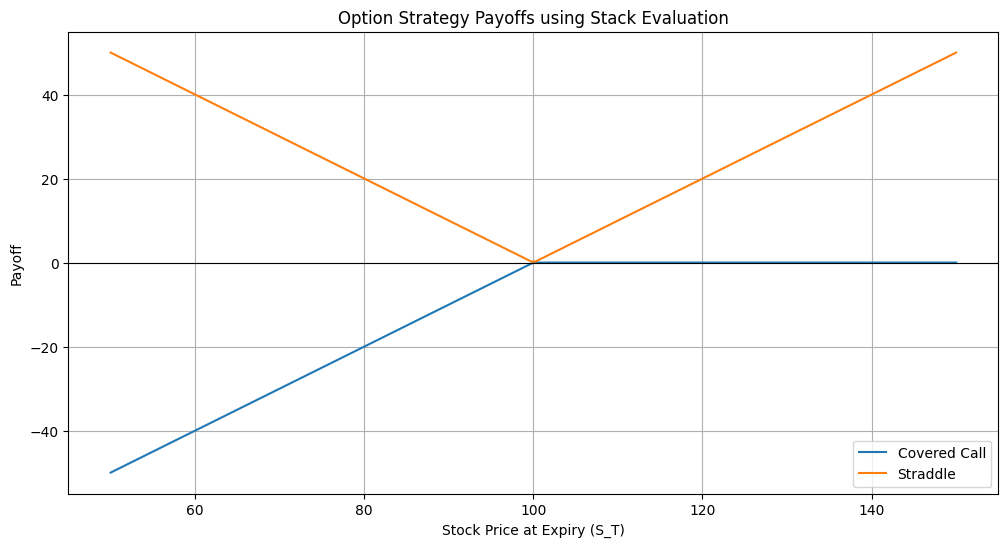

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Helper payoff functions -----
def stock_payoff(S, S0):
    return S - S0  # Profit relative to initial stock price

def call_payoff(S, K):
    return np.maximum(S - K, 0)

def put_payoff(S, K):
    return np.maximum(K - S, 0)

# ----- Stack-based payoff evaluator -----
def evaluate_strategy(S_range, tokens, S0=None):
    """
    Evaluate an option strategy payoff using stack evaluation.
    tokens: list of strings in postfix notation, e.g. ["Stock", "Call100", "-"]
    """
    stack = []

    for token in tokens:
        if token.startswith("Call"):
            K = float(token[4:])
            stack.append(call_payoff(S_range, K))
        elif token.startswith("Put"):
            K = float(token[3:])
            stack.append(put_payoff(S_range, K))
        elif token == "Stock":
            if S0 is None:
                raise ValueError("Need initial stock price S0 for stock payoff")
            stack.append(stock_payoff(S_range, S0))
        elif token == "+":
            b = stack.pop()
            a = stack.pop()
            stack.append(a + b)
        elif token == "-":
            b = stack.pop()
            a = stack.pop()
            stack.append(a - b)
        else:
            raise ValueError(f"Unknown token: {token}")

    return stack.pop()

# ----- Example strategies -----
S = np.linspace(50, 150, 200)  # price range at expiry
S0 = 100  # initial stock price

# Covered Call = Stock - Call(100)
covered_call = evaluate_strategy(S, ["Stock", "Call100", "-"], S0)

# Straddle = Call(100) + Put(100)
straddle = evaluate_strategy(S, ["Call100", "Put100", "+"], S0)

# ----- Plot results -----
plt.figure(figsize=(12,6))
plt.plot(S, covered_call, label="Covered Call")
plt.plot(S, straddle, label="Straddle")
plt.axhline(0, color="black", linewidth=0.8)
plt.xlabel("Stock Price at Expiry (S_T)")
plt.ylabel("Payoff")
plt.title("Option Strategy Payoffs using Stack Evaluation")
plt.legend()
plt.grid(True)
plt.show()
